In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [37]:
data = pd.read_excel("Concrete_Data.xls")
print("共有数据量：",len(data))

共有数据量： 1030


In [38]:
# 给上述的数据集的列名重新改名，方便编程和阅读
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [39]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [40]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [41]:
# describe()函数就是返回data数据结构的统计变量。
# 其目的在于观察这一系列数据的范围、大小、波动趋势等等，为后面的模型选择打下基础。
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


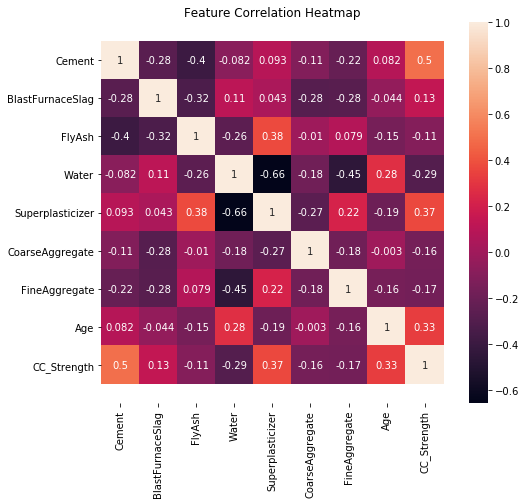

In [76]:
# 
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True,square=True,linecolor='cyan')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

D:\python3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

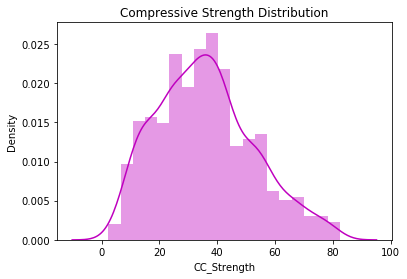

In [80]:
# 对因变量CC_Strength做分布图，大致符合正态分布。
ax = sns.distplot(data.CC_Strength,color="m")
ax.set_title("Compressive Strength Distribution")

In [45]:
# 区分自变量和因变量，将前面所有的作为自变量，最后一个作为回归的因变量。
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [47]:
from sklearn.preprocessing import StandardScaler

# 标准归一化，将特征表现为标准正态分布数据(均值为0，方差为1)。
# 如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器不能从其他特征中学习，从而降低精度。
# 进行归一化可以加快梯度下降求解的速度。
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Scaler是在训练数据上拟合的，而不是在测试数据上拟合的。因为，我们是在重新调整后的训练数据上训练我们的模型，当测试数据遵循相同的分布时，模型表现良好。而如果标尺再次拟合在测试数据上，会导致测试数据的均值和标准差不同。导致性能的损失。

In [48]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
SVM = svm.SVR()
KNN = neighbors.KNeighborsRegressor()
Ada = AdaBoostRegressor(n_estimators=100)#这里使用100个决策树
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
GBRT = GradientBoostingRegressor(n_estimators=100)

# Fitting models on Training data
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
SVM.fit(X_train, y_train)
KNN.fit(X_train, y_train)
Ada.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
GBRT.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_Ada = Ada.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_GBRT = GBRT.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("""LinearRegression \t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))
print("""SVM-Regression \t\t {:.2f} \t {:.2f} {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_SVM)),mean_squared_error(y_test, y_pred_SVM),
            mean_absolute_error(y_test, y_pred_SVM), r2_score(y_test, y_pred_SVM)))
print("""KNN-Regression \t\t {:.2f} \t {:.2f} \t{:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_KNN)),mean_squared_error(y_test, y_pred_KNN),
            mean_absolute_error(y_test, y_pred_KNN), r2_score(y_test, y_pred_KNN)))
print("""AdaBoost Regressor \t {:.2f} \t {:.2f} \t{:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_Ada)),mean_squared_error(y_test, y_pred_Ada),
            mean_absolute_error(y_test, y_pred_Ada), r2_score(y_test, y_pred_Ada)))
print("""DecisionTreeRegressor \t {:.2f} \t {:.2f} \t{:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))
print("""RandomForestRegressor \t {:.2f} \t {:.2f} \t{:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
print("""GBRTRegressor \t\t {:.2f} \t {:.2f} \t{:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_GBRT)),mean_squared_error(y_test, y_pred_GBRT),
            mean_absolute_error(y_test, y_pred_GBRT), r2_score(y_test, y_pred_GBRT)))


Model			 RMSE 	 MSE 	 MAE 	 R2
LinearRegression 	 11.17 	 124.81 8.79 	0.548376
LassoRegression 	 11.97 	 143.22 9.56 	0.481768
RidgeRegression 	 11.17 	 124.85 8.80 	0.548220
SVM-Regression 		 10.27 	 105.39 8.05 	0.618657
KNN-Regression 		 9.55 	 91.14 	7.52 	0.670206
AdaBoost Regressor 	 7.91 	 62.50 	6.48 	0.773860
DecisionTreeRegressor 	 7.41 	 54.90 	4.83 	0.801340
RandomForestRegressor 	 5.34 	 28.52 	3.73 	0.896802
GBRTRegressor 		 5.35 	 28.62 	3.88 	0.896433


对于线性回归和逻辑回归，其目标函数为：
g(x) = w1x1 + w2x2 + w3x3 + w4x4 + w0
如果有激活函数sigmoid，增加非线性变化,则为分类,即逻辑回归
如果没有激活函数，则为回归
对于这样的线性函数，都会有coef_和intercept_函数
如下：
    lr = LogisticRegression()
    lr.coef_
    lr.intercept_
coef_和intercept_都是模型参数，即为w
coef_为w1到w4
intercept_为w0


**线性回归模型**

回归问题的常用方法。
* 该算法为每个输入特征分配系数，使输入特征和目标变量之间形成线性关系，从而使目标函数最小化。
* 本例中使用的目标函数是均方误差。

线性回归有三个版本

* Linear 回归 - 没有正则化
* Lasso  回归 - L1正则化（试图将系数推到零）。
* Ridge  回归 - L2正则化（尽量降低系数）。

我们将对这三种算法进行对比。


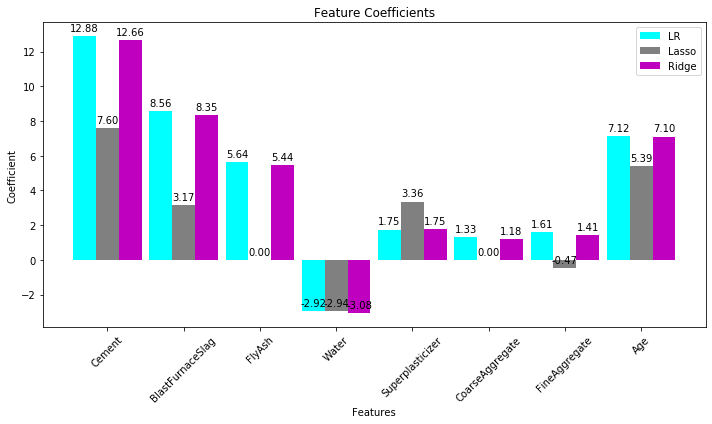

In [81]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR',color="cyan")
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso',color="gray")
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge',color="m")

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

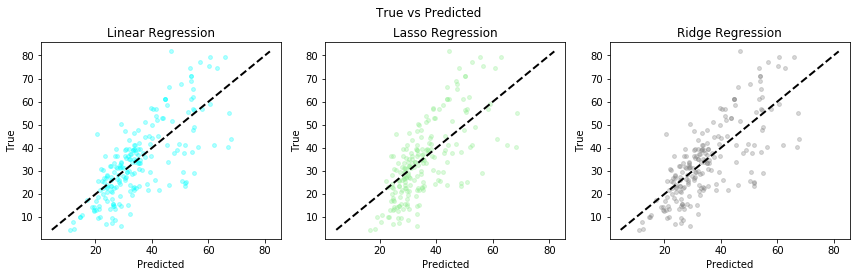

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))


ax1.scatter(y_pred_lr, y_test, s=15,c="cyan",alpha="0.3")
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=15,c="green",alpha="0.3")
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=15,c="gray",alpha="0.3")
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


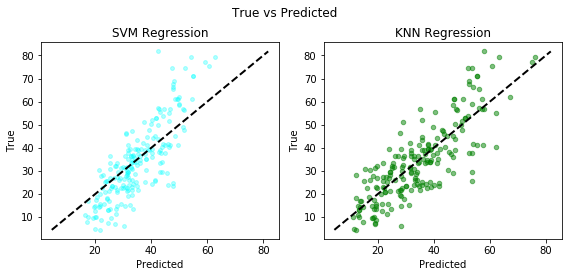

In [64]:
fig, (ax4, ax5) = plt.subplots(1,2, figsize=(8,4))

ax4.scatter(y_pred_SVM, y_test, s=15,c="cyan",alpha="0.3")
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("SVM Regression")

ax5.scatter(y_pred_KNN, y_test, s=20,c="green",alpha="0.3")
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_ylabel("True")
ax5.set_xlabel("Predicted")
ax5.set_title("KNN Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


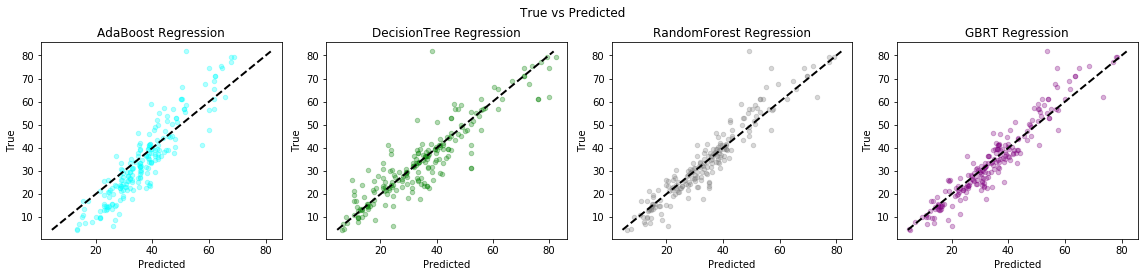

In [66]:
fig, (ax6, ax7, ax8, ax9) = plt.subplots(1,4, figsize=(16,4))

ax6.scatter(y_pred_Ada, y_test, s=20,c="cyan",alpha="0.3")
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_ylabel("True")
ax6.set_xlabel("Predicted")
ax6.set_title("AdaBoost Regression")

ax7.scatter(y_pred_dtr, y_test, s=20,c="green",alpha="0.3")
ax7.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax7.set_ylabel("True")
ax7.set_xlabel("Predicted")
ax7.set_title("DecisionTree Regression")

ax8.scatter(y_pred_rfr, y_test, s=20,c="gray",alpha="0.3")
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax8.set_ylabel("True")
ax8.set_xlabel("Predicted")
ax8.set_title("RandomForest Regression")

ax9.scatter(y_pred_GBRT, y_test, s=20,c="purple",alpha="0.3")
ax9.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax9.set_ylabel("True")
ax9.set_xlabel("Predicted")
ax9.set_title("GBRT Regression")


fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


观测几个树形回归模型的FeatureImportance,

与前面线性模型的判断作对比

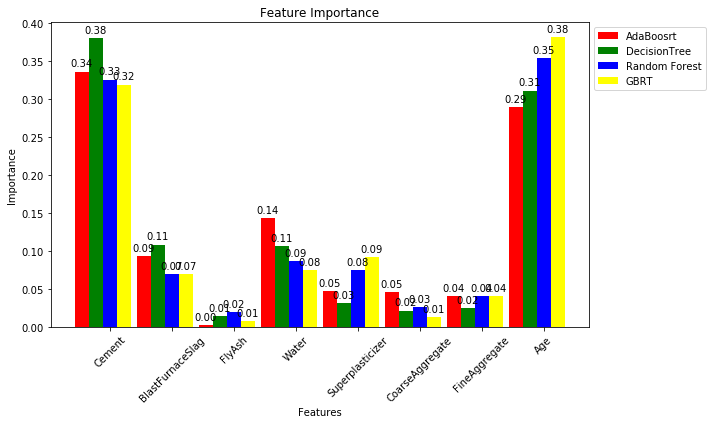

In [74]:
feature_Ada = Ada.feature_importances_
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
feature_GBRT = GBRT.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels))
width = 0.9

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_Ada, width/4, label='AdaBoosrt',color="r")
rects2 = ax.bar(x-(width/4), feature_dtr, width/4, label='DecisionTree',color="g")
rects3 = ax.bar(x, feature_rfr, width/4, label='Random Forest',color="b")
rects4 = ax.bar(x+(width/4), feature_GBRT, width/4, label='GBRT',color="yellow")

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

在基于树状模型的AdaBoost，DecisionTree，RandomForest和GBRT模型中，

* Cement和Age被视为最重要的特征

* Flyash，Coarse 和 Fine aggregates是预测混凝土强度时最不重要的因素。


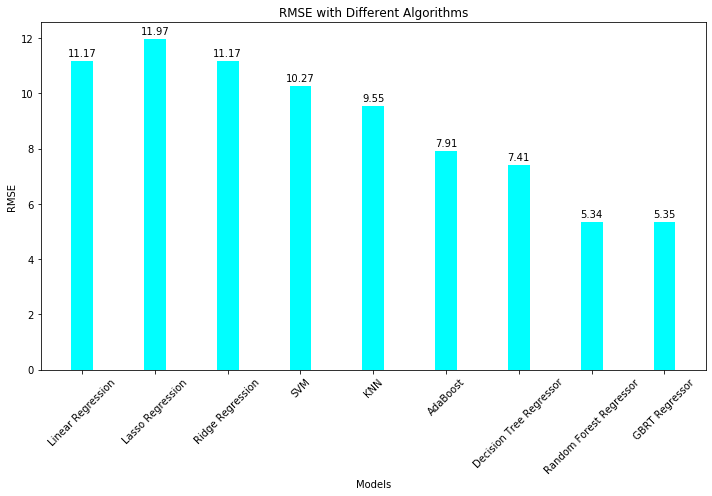

In [75]:
models = [lr, lasso, ridge, SVM, KNN, Ada, dtr, rfr,GBRT]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression",
         "SVM", "KNN","AdaBoost", "Decision Tree Regressor",
         "Random Forest Regressor","GBRT Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names))
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width,color="cyan")
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

<h1>结论</h1>
Random Forest Regressor是解决这个问题的最佳选择。

In [56]:
# 根据RandomForest的重要性排序
rfr.feature_importances_

array([0.3257252 , 0.07019937, 0.01983765, 0.08709919, 0.07547497,
       0.02647956, 0.04130073, 0.35388333])

In [57]:
X_train_sel = X_train[:,[0,1,3,4,5,6,7]]
X_test_sel = X_test[:,[0,1,3,4,5,6,7]]

rfr_sel = RandomForestRegressor()
rfr_sel.fit(X_train_sel, y_train)

y_pred_rfr_sel = rfr_sel.predict(X_test_sel)

print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("""Random Forest Regressor  {:.2f} \t {:.2f} \t {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
print("""Random Forest Select \t {:.2f} \t  {:.2f}  {:.2f} \t{:.6f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr_sel)),mean_squared_error(y_test, y_pred_rfr_sel),
            mean_absolute_error(y_test, y_pred_rfr_sel), r2_score(y_test, y_pred_rfr_sel)))


Model			 RMSE 	 MSE 	 MAE 	 R2
Random Forest Regressor  5.34 	 28.52 	 3.73 	0.896802
Random Forest Select 	 5.23 	  27.39  3.74 	0.900874
